In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import time
import requests
import json
import statistics

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from twit_api import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
tsla_twit_feedback=0
appl_twit_feedback=0
hmny_twit_feedback=0
tsla_pred_feedback=0
appl_pred_feedback=0
hmny_pred_feedback=0

In [2]:
# Target Account
target_users = ['@elonmusk', '@HMNYHQ1', '@tim_cook', '@tesla']

all_user_list = []
all_compound_list = []
all_pos_list = []
all_neu_list = []
all_neg_list = []
all_sentiment_list = []
tsla_com_list=[]
tsla_pos_list=[]
tsla_neg_list=[]
tsla_neu_list=[]
appl_com_list=[]
appl_pos_list=[]
appl_neg_list=[]
appl_neu_list=[]
hmny_com_list=[]
hmny_pos_list=[]
hmny_neg_list=[]
hmny_neu_list=[]

# Loop through all targer terms
for target_user in target_users:
    

    # Variables for holding sentiments
    user_list = []
    compound_list = []
    pos_list = []
    neu_list = []
    neg_list = []


    for x in range(5):
        public_tweets = api.user_timeline(target_user, page=x)

        for tweet in public_tweets:

            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            user_list.append(tweet["user"]["screen_name"])
            

            compound_list.append(compound)
            pos_list.append(pos)
            neu_list.append(neu)
            neg_list.append(neg)
          
            if target_user==target_users[0] or target_user==target_users[3]:
                tsla_com_list.append(compound)
                tsla_pos_list.append(pos)
                tsla_neg_list.append(neg)
                tsla_neu_list.append(neu)
            elif target_user==target_users[1]:
                hmny_com_list.append(compound)
                hmny_pos_list.append(pos)
                hmny_neg_list.append(neg)
                hmny_neu_list.append(neu)
            elif target_user==target_users[2]:
                appl_com_list.append(compound)
                appl_pos_list.append(pos)
                appl_neg_list.append(neg)
                appl_neu_list.append(neu)
            else:
                print('error')
    all_user_list.append(user_list)
    all_compound_list.append(compound_list)
    all_pos_list.append(pos_list)
    all_neu_list.append(neu_list)
    all_neg_list.append(neg_list)

            
        
    sentiments = np.mean(compound_list)
    all_sentiment_list.append(sentiments)

In [3]:
all_user_list = np.array(all_user_list).flatten().tolist()
all_compound_list = np.array(all_compound_list).flatten().tolist()
all_pos_list = np.array(all_pos_list).flatten().tolist()
all_neu_list = np.array(all_neu_list).flatten().tolist()
all_neg_list = np.array(all_neg_list).flatten().tolist()


#sentiment = {'User': all_user_list,'Compound_Score': np.mean(all_compound_list), 'Pos_Score': np.mean(all_pos_list), 'Neu_Score': np.mean(all_neu_list), 'Neg_Score': np.mean(all_neg_list)}
#sentiment_df = pd.DataFrame(sentiment)
#sentiment_df.to_csv("Sentiment Analysis.csv", index=False, header=True)
#sentiment_df

In [4]:
tesla = {
        "User": "Tesla",
        "Compound": np.mean(tsla_com_list),
        "Positive": np.mean(tsla_pos_list),
        "Neutral": np.mean(tsla_neg_list),
        "Negative": np.mean(tsla_neu_list)
    }
apple = {
        "User": "Apple",
        "Compound": np.mean(appl_com_list),
        "Positive": np.mean(appl_pos_list),
        "Neutral": np.mean(appl_neg_list),
        "Negative": np.mean(appl_neu_list)
    }
hmny = {
        "User": "HMNY",
        "Compound": np.mean(hmny_com_list),
        "Positive": np.mean(hmny_pos_list),
        "Neutral": np.mean(hmny_neg_list),
        "Negative": np.mean(hmny_neu_list)
    }
print(tesla,
      apple,
      hmny)

{'User': 'Tesla', 'Compound': 0.116362, 'Positive': 0.11706499999999999, 'Neutral': 0.038155, 'Negative': 0.844785} {'User': 'Apple', 'Compound': 0.488037, 'Positive': 0.23571999999999999, 'Neutral': 0.02625, 'Negative': 0.7380199999999999} {'User': 'HMNY', 'Compound': 0.16470700000000005, 'Positive': 0.11623, 'Neutral': 0.0189, 'Negative': 0.86488}


In [5]:
# URL for GET requests to retrieve vehicle data
ticker = ["AAPL","TSLA","HMNY"]

url = "https://api.iextrading.com/1.0/stock/"
duration = "/chart/3m"

In [6]:

#7 day moving average

week_counter = 0 
avg_counter = 0
series1 = 10
series2 = 7
count = 0  
moving_avg =[]
company = []
appl_close=[]
tsla_close=[]
hmny_close=[]
appl_open=[]
tsla_open=[]
hmny_open=[]
for i in ticker:
    
    response = requests.get(url+i+duration).json()
    print(i)
    count = 0
    
    for x in range(series1):

            close = []
            
            for y in range(series2):
                try:
                    close.append(response[count]['close'])
                    #print(close)
                    if i == ticker[0]:
                        appl_close.append(response[count]['close'])
                        appl_open.append(response[count]['open'])
                    elif i == ticker[1]:
                        tsla_close.append(response[count]['close'])
                        tsla_open.append(response[count]['open'])
                    elif i == ticker[2]:
                        hmny_close.append(response[count]['close'])
                        hmny_open.append(response[count]['open'])
                    count = count +1
                except:
                    print("No value")    
                    
            print(close) 
            avg = statistics.mean(close)
            
            company.append(i)
            moving_avg.append(avg)

            #zip(company, moving_avg)

print("Ticker and Moving Average")
for c, m in zip(company, moving_avg):  
    print(f'{c} {m}')        
    #print(moving_avg)

AAPL
[190.6613, 190.2428, 190.7809, 189.7346, 191.2094, 190.7709, 190.9403]
[192.3255, 194.1391, 193.5312, 190.3125, 189.2463, 189.6249, 200.7958]
[206.6652, 207.2631, 208.3393, 206.3862, 206.5257, 208.15, 207.53]
[208.87, 209.75, 210.24, 213.32, 217.58, 215.46, 215.04]
[215.05, 215.49, 216.16, 217.94, 219.7, 222.98, 225.03]
[227.63, 228.36, 226.87, 223.1, 221.3, 218.33, 223.85]
[221.07, 226.41, 223.84, 217.88, 218.24, 218.37, 220.03]
[217.66, 220.79, 222.19, 220.42, 224.95, 225.74, 227.26]
[229.28, 232.07, 227.99, 224.29, 223.77, 226.87, 216.36]
No value
No value
No value
No value
No value
[214.45, 222.11]
TSLA
[318.87, 310.1, 322.69, 323.85, 320.23, 313.58, 303.2]
[297.43, 308.74, 306.65, 297.18, 290.17, 298.14, 300.84]
[349.54, 348.17, 341.99, 379.57, 370.34, 352.45, 355.49]
[356.41, 347.64, 338.69, 335.45, 305.5, 308.44, 321.9]
[321.64, 320.1, 322.82, 319.27, 311.86, 305.01, 303.15]
[301.66, 288.95, 280.74, 280.95, 263.24, 285.5, 279.44]
[290.54, 289.46, 295.2, 294.84, 284.96, 299.

In [7]:
#create data frame from API call
summary = pd.DataFrame({"Ticker": company,
                      "Moving Average": moving_avg})
summary

,Ticker,Moving Average
0,AAPL,190.620029
1,AAPL,192.853614
2,AAPL,207.265643
3,AAPL,212.894286
4,AAPL,218.907143
5,AAPL,224.205714
6,AAPL,220.834286
7,AAPL,222.715714
8,AAPL,225.804286
9,AAPL,218.280000


In [8]:
#create dataframe and reset index to grpah
AAPL = summary.loc[(summary["Ticker"] == "AAPL")]
AAPL = AAPL.reset_index(drop=True)


TSLA = summary.loc[(summary["Ticker"] == "TSLA")]
TSLA = TSLA.reset_index(drop=True)

HMNY = summary.loc[(summary["Ticker"] == "HMNY")]
#HMNY = summary.loc[(summary["Moving Average"] <= .04)]
HMNY = HMNY.reset_index(drop=True)
HMNY

,Ticker,Moving Average
0,HMNY,28.496429
1,HMNY,6.029143
2,HMNY,0.071900
3,HMNY,0.038100
4,HMNY,0.021657
5,HMNY,0.022814
6,HMNY,0.017200
7,HMNY,0.016100
8,HMNY,0.021129
9,HMNY,0.017450


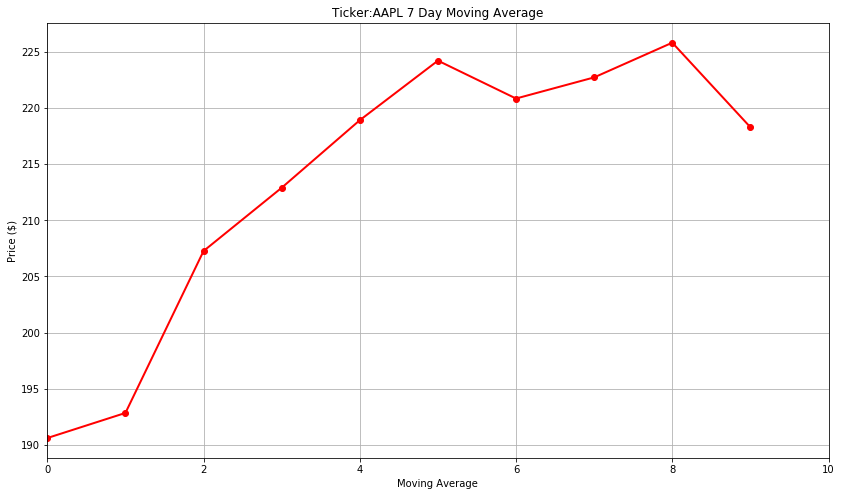

In [18]:
#Graph AAPL 
#graph properties
plt.xlabel("Moving Average")
plt.ylabel("Price ($)")
plt.title(f"Ticker:AAPL 7 Day Moving Average")
plt.grid()

#graph
plt.rcParams["figure.figsize"] = [14,8]
plt.xlim([0,series1])
plt.plot(AAPL["Moving Average"], marker="o", color="red", linewidth=2)
plt.savefig("AAPL.png")
plt.show()


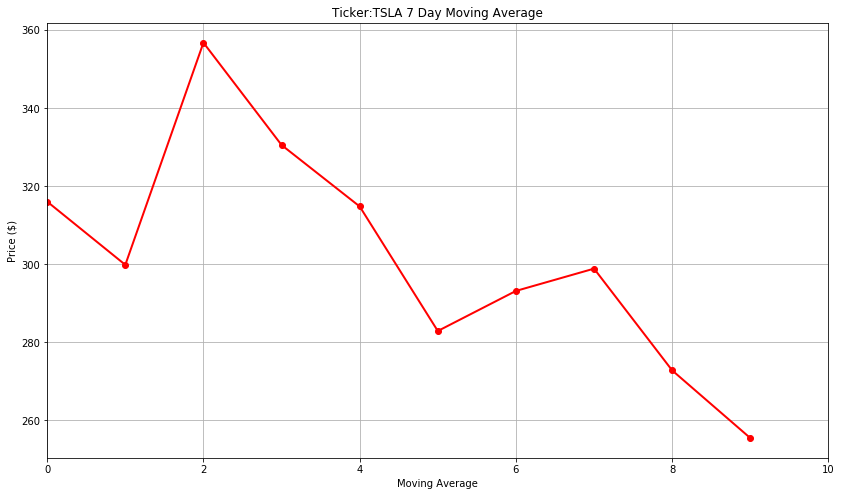

In [10]:
#Graph TSLA
#graph properties
plt.xlabel("Moving Average")
plt.ylabel("Price ($)")
plt.title(f"Ticker:TSLA 7 Day Moving Average")
plt.grid()

#graph
plt.rcParams["figure.figsize"] = [14,8]
plt.xlim([0,series1])
plt.plot(TSLA["Moving Average"], marker="o", color="red", linewidth=2)
plt.savefig("TSLA.png")
plt.show()

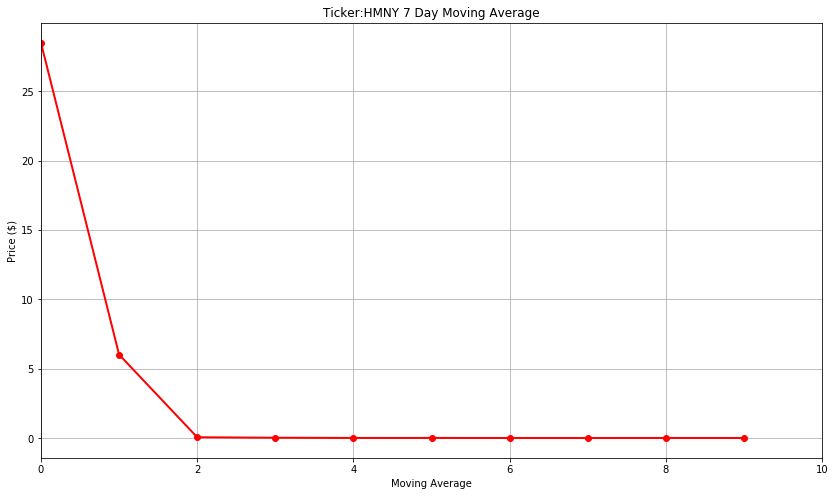

In [17]:
#Graph HMNY
#graph properties
plt.xlabel("Moving Average")
plt.ylabel("Price ($)")
plt.title(f"Ticker:HMNY 7 Day Moving Average")
plt.grid()

#graph
plt.rcParams["figure.figsize"] = [14,8]
plt.xlim([0,series1])
plt.plot(HMNY["Moving Average"], marker="o", color="red", linewidth=2)
#plt.savefig("HMNY.png")
plt.show()


In [12]:

#if  +,-, or = then add subtract the difference to the tsla twit feedback to adjust the results
#add a check so it checks yesterdays prediction to today but doesnt duplicate.
appl_dif=appl_close[-1]-appl_close[-2]
tsla_dif=tsla_close[-1]-tsla_close[-2]
hmny_dif=hmny_close[-1]-hmny_close[-2]
tsla_pred=tsla_close[-2]-tsla_open[-1]
appl_pred=appl_close[-2]-appl_open[-1]
hmny_pred=hmny_close[-2]-hmny_open[-1]

if tesla['Neutral']> tesla['Positive'] and tesla['Negative']:
    tsla_twit_outcome= "Flat"
    if tsla_dif==0:
        tsla_trend= "right"
    if tsla_pred==0:
        tsla_pred_trend="right"
elif tesla['Positive']>tesla['Negative']:
    tsla_twit_outcome= "Positive"
    if tsla_dif>0:
        tsla_trend= "right"
    if tsla_pred>0:
        tsla_predtrend= "right"
else:
    tsla_twit_outcome= "Negative"
    if tsla_dif<0:
        tsla_trend= "right"
    else:
        tsla_trend="wrong"
    if tsla_pred<0:
        tsla_pred_trend= "right"
    else:
        tsla_pred_trend="wrong"
#tsla_twit_outcome

if apple['Neutral']> apple['Positive'] and apple['Negative']:
    appl_twit_outcome= "Flat"
    if appl_dif==0:
        appl_trend= "right"
    if appl_pred==0:
        appl_pred_trend= "right" 
elif apple['Positive']>apple['Negative']:
    appl_twit_outcome= "Positive"
    if appl_dif>0:
        appl_trend= "right"   
    if appl_pred>0:
        appl_pred_trend= "right" 
else:
    appl_twit_outcome= "Negative"
    if appl_dif<0:
        appl_trend= "right"
    else:
        appl_trend="wrong"
    if appl_pred<0:
        appl_pred_trend= "right"
    else:
        appl_pred_trend="wrong"
#tsla_twit_outcome
#appl_twit_outcome
if hmny['Neutral']> hmny['Positive'] and hmny['Negative']:
    hmny_twit_outcome= "Flat"
    if hmny_dif==0:
        hmny_trend= "right"
    if hmny_pred==0:
        hmny_pred_trend= "right"
elif hmny['Positive']>hmny['Negative']:
    hmny_twit_outcome= "Positive"
    if hmny_pred>0:
        hmny_pred_trend= "right"
else:
    hmny_twit_outcome= "Negative"
    if hmny_dif<0:
        hmny_trend= "right"
    else:
        hmny_trend="wrong"
    if hmny_pred<0:
        hmny_pred_trend= "right"
    else:
        hmny_pred_trend="wrong"
        

if tsla_pred==0:
    tsla_pred_outcome="Flat"
    if tsla_dif ==0:
        tsla_pred_trend="right"
    else:
        tsla_pred_trend="wrong"
elif tsla_pred>0:
    tsla_pred_outcome= "Positive"
    if tsla_dif >0:
        tsla_pred_trend="right"
    else:
        tsla_pred_trend="wrong"
if tsla_pred<0:
    tsla_pred_outcome= "Negative"
    if tsla_dif <0:
        tsla_pred_trend="right"
    else:
        tsla_pred_trend="wrong"
if appl_pred==0:
    appl_pred_outcome="Flat"
    if appl_dif ==0:
        appl_pred_trend="right"
    else:
        appl_pred_trend="wrong"
elif appl_pred>0:
    appl_pred_outcome= "Positive"
    if appl_dif >0:
        appl_pred_trend="right"
    else:
        appl_pred_trend="wrong"
if appl_pred<0:
    appl_pred_outcome= "Negative"
    if appl_dif <0:
        appl_pred_trend="right"
    else:
        appl_pred_trend="wrong"
if hmny_pred==0:
    hmny_pred_outcome="Flat"
    if hmny_dif ==0:
        hmny_pred_trend="right"
    else:
        hmny_pred_trend="wrong"
elif hmny_pred>0:
    hmny_pred_outcome= "Positive"
    if hmny_dif >0:
        hmny_pred_trend="right"
    else:
        hmny_pred_trend="wrong"
if hmny_pred<0:
    hmny_pred_outcome= "Negative"
    if hmny_dif <0:
        hmny_pred_trend="right"
    else:
        hmny_pred_trend="wrong"

print("Based off of twitter Tesla should trend "+tsla_twit_outcome)
print("If we followed the opening trend Tesla should trend "+tsla_pred_outcome)
print("We ended with a difference of "+str(tsla_dif))
print("So twitter was "+tsla_trend+" and the trend was "+tsla_pred_trend)
print(" ")
print("Based off of twitter Apple should trend "+appl_twit_outcome)
print("If we followed the opening trend Apple should trend "+appl_pred_outcome)
print("We ended with a difference of "+str(appl_dif))
print("So twitter was "+appl_trend+" and the trend was "+appl_pred_trend)
print(" ")
print("Based off of twitter HMNY should trend "+hmny_twit_outcome)
print("If we followed the opening trend HMNY should trend "+hmny_pred_outcome)
print("We ended with a difference of "+str(hmny_dif))
print("So twitter was "+hmny_trend+" and the trend was "+hmny_pred_trend)
print(" ")

Based off of twitter Tesla should trend Negative
If we followed the opening trend Tesla should trend Negative
We ended with a difference of 6.549999999999983
So twitter was wrong and the trend was wrong
 
Based off of twitter Apple should trend Negative
If we followed the opening trend Apple should trend Negative
We ended with a difference of 7.660000000000025
So twitter was wrong and the trend was wrong
 
Based off of twitter HMNY should trend Negative
If we followed the opening trend HMNY should trend Negative
We ended with a difference of -0.00030000000000000165
So twitter was right and the trend was right
 


In [13]:
if tsla_trend=="right":
    tsla_twit_feedback+=1
else:
    tsla_twit_feedback-=1
if appl_trend=="right":
    appl_twit_feedback+=1
else:
    appl_twit_feedback-=1
if hmny_trend=="right":
    hmny_twit_feedback+=1
else:
    hmny_twit_feedback-=1
    
if tsla_pred_trend=="right":
    tsla_pred_feedback+=1
else:
    tsla_pred_feedback-=1
if appl_pred=="right":
    appl_pred_feedback+=1
else:
    appl_pred_feedback-=1
if hmny_pred_trend=="right":
    hmny_pred_feedback+=1
else:
    hmny_pred_feedback-=1

In [14]:
tsla_twit_feedback
appl_twit_feedback
hmny_twit_feedback
tsla_pred_feedback
appl_pred_feedback
hmny_pred_feedback

feedback = pd.DataFrame({"Twitter TSLA": [tsla_twit_feedback],
                         "Twitter AAPL": [appl_twit_feedback],
                         "Twitter HMNY": [hmny_twit_feedback],
                         "Prediction TSLA": [tsla_pred_feedback],
                         "Prediction AAPL": [appl_pred_feedback],
                         "Prediction HMNY": [hmny_pred_feedback]})
feedback


,Twitter TSLA,Twitter AAPL,Twitter HMNY,Prediction TSLA,Prediction AAPL,Prediction HMNY
0,-1,-1,1,-1,-1,1


In [15]:
#save to csv
feedback.to_csv("feedback.csv", encoding="utf-8", index=False)
